In [1]:
!python --version

Python 3.9.2


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [3]:
conn = sqlite3.connect("../streamdb.db")

In [4]:
c = conn.cursor()

# Read Lapdata and determine sessionTime of each new Lap

In [5]:
session_name = 'russia_qualifying'

In [6]:
sql = f"""SELECT * FROM {session_name}_lapdata"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1109,
  0.06953773647546768,
  0.0,
  0.0,
  59.275184631347656,
  59.275184631347656,
  20,
  1)]

In [7]:
lapdata = pd.DataFrame(data, columns =['id', 'sessionTime', 'lastLapTime', 'currentLapTime', 'lapDistance', 'totalDistance', 'carPosition', 'currentLapNum'])
lapdata.head()

id  sessionTime  lastLapTime  currentLapTime  lapDistance  totalDistance  \
0  1109     0.069538          0.0             0.0    59.275185      59.275185   
1  1110     0.333629          0.0             0.0    59.275185      59.275185   
2  1111     0.433747          0.0             0.0    59.275185      59.275185   
3  1112     1.234509          0.0             0.0    59.275185      59.275185   
4  1113     1.434659          0.0             0.0    59.275185      59.275185   

   carPosition  currentLapNum  
0           20              1  
1           20              1  
2           20              1  
3           20              1  
4           20              1

In [8]:
laptimes = lapdata['lastLapTime'].unique()
last_lap = lapdata[lapdata['currentLapNum'] == len(laptimes)]['currentLapTime'].max()
laptimes = np.append(laptimes, last_lap)
laptimes

array([0.00000000e+00, 1.06398186e+02, 9.92270737e+01, 9.70072479e+01,
       1.12218475e+02, 1.36152191e+02, 1.52090027e+02, 9.71950073e+01,
       9.68208008e+01, 9.63992310e+01, 9.64999390e+01, 9.67602539e+01,
       9.66683350e+01, 9.65056152e+01, 9.64656982e+01, 9.81198730e+01,
       1.00879883e+02, 1.21920166e+02, 9.47364502e+01, 9.51239014e+01,
       9.40809326e+01, 9.58327637e+01, 9.57194824e+01, 9.50002441e+01,
       9.55383301e+01, 9.61879883e+01, 9.59592285e+01, 9.64704590e+01,
       1.66942496e-02])

In [39]:
sns.scatterplot(x=range(1, len(laptimes)), y=laptimes[1:], s=150)
plt.ylim(92, 140)
plt.title("Laptimes");
plt.savefig("laptimes.png")

Best Laptime: 94.0809326171875
Median: 96.505615234375
Mean: 101.92510308159723
Standard Deviation: 13.478088427259616
Slowest Laptime: 152.09002685546875


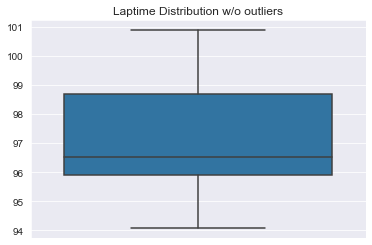

In [40]:
unique_laptimes = lapdata[lapdata['lastLapTime'] > 0]['lastLapTime'].unique()
print("Best Laptime:", np.min(unique_laptimes))
print("Median:", np.median(unique_laptimes))
print("Mean:", np.mean(unique_laptimes))
print("Standard Deviation:", np.std(unique_laptimes))
print("Slowest Laptime:", np.max(unique_laptimes))
sns.boxplot(y=unique_laptimes, showfliers = False)
plt.title("Laptime Distribution w/o outliers")
plt.draw()
plt.savefig("laptimes_boxplot.png")

In [11]:
for i, timing in enumerate(lapdata['lastLapTime'].unique()):
    print(i, timing)

0 0.0
1 106.39818572998047
2 99.2270736694336
3 97.00724792480469
4 112.21847534179688
5 136.15219116210938
6 152.09002685546875
7 97.19500732421875
8 96.82080078125
9 96.39923095703125
10 96.49993896484375
11 96.76025390625
12 96.6683349609375
13 96.505615234375
14 96.4656982421875
15 98.119873046875
16 100.8798828125
17 121.920166015625
18 94.7364501953125
19 95.1239013671875
20 94.0809326171875
21 95.832763671875
22 95.719482421875
23 95.000244140625
24 95.538330078125
25 96.18798828125
26 95.959228515625
27 96.470458984375


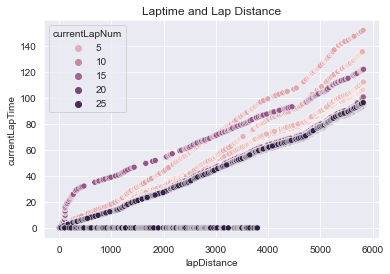

In [41]:
sns.scatterplot(x='lapDistance', y='currentLapTime', hue='currentLapNum', data=lapdata)
plt.title("Laptime and Lap Distance");
plt.savefig("laptimes_lapdistance.png")

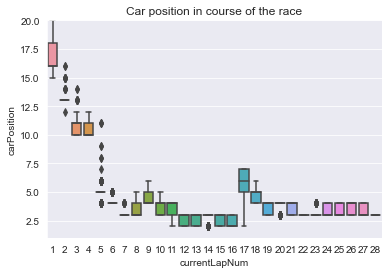

In [42]:
sns.boxplot(x='currentLapNum', y='carPosition', data=lapdata)
plt.ylim(1,20)
plt.title("Car position in course of the race");
plt.savefig("positions.png")

In [14]:
# Determine the sessiontime at every end of a lap
upper_boundaries = [0]
for lap in lapdata['currentLapNum'].unique():
    upper_boundary = lapdata[lapdata['currentLapNum'] == lap]['sessionTime'].max()
    upper_boundaries.append(upper_boundary)
upper_boundaries[:5]

[0,
 113.18692016601562,
 212.4939422607422,
 309.6661682128906,
 421.8433532714844,
 557.2151489257812,
 709.91650390625,
 807.07373046875,
 903.9109497070312,
 1000.2314453125,
 1096.958984375,
 1193.3033447265625,
 1289.8009033203125,
 1386.74365234375,
 1482.9525146484375,
 1580.7933349609375,
 1682.1109619140625,
 1804.2569580078125,
 1898.1837158203125,
 1994.14404296875,
 2087.499267578125,
 2183.807373046875,
 2279.1298828125,
 2374.0888671875,
 2469.609619140625,
 2565.599609375,
 2661.41064453125,
 2757.882080078125,
 2836.374267578125]

# Telemetry Data

In [15]:
sql = f"""SELECT * FROM {session_name}_telemetry"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(943,
  0.1335986852645874,
  0,
  0.0,
  -0.000939941790420562,
  0.0,
  0,
  4281.0,
  0,
  518.0,
  518.0,
  387.0,
  387.0,
  77.0,
  78.0,
  81.0,
  84.0,
  82.0,
  83.0,
  84.0,
  85.0,
  105.0)]

In [16]:
column_names = [description[0] for description in c.description]
column_names[:5]

['id', 'sessionTime', 'speed', 'throttle', 'steer']

In [17]:
telemetry = pd.DataFrame(data, columns =column_names)
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0  943     0.133599      0       0.0 -0.000940    0.0     0     4281.0    0   
1  944     0.233571      0       0.0 -0.001184    0.0     0     4293.0    0   
2  945     0.600509      0       0.0 -0.001184    0.0     0     4297.0    0   
3  946     0.800718      0       0.0 -0.001184    0.0     0     4284.0    0   
4  947     1.017548      0       0.0 -0.001184    0.0     0     4317.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                 518.0                 518.0                 387.0   
1                 517.0                 518.0                 386.0   
2                 516.0                 517.0                 386.0   
3                 516.0                 516.0                 385.0   
4                 515.0                 515.0                 385.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                 387.0                        77.0   
1                 387.0                        77.0   
2                 386.0                        76.0   
3                 385.0                        76.0   
4                 385.0                        76.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        78.0                        81.0   
1                        77.0                        81.0   
2                        77.0                        81.0   
3                        77.0                        81.0   
4                        77.0                        80.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        84.0                      82.0   
1                        84.0                      82.0   
2                        84.0                      82.0   
3                        84.0                      82.0   
4                        83.0                      82.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      83.0                      84.0   
1                      83.0                      84.0   
2                      83.0                      84.0   
3                      83.0                      84.0   
4                      83.0                      84.0   

   tyresInnerTemperature_FR  engineTemperature  
0                      85.0              105.0  
1                      85.0              105.0  
2                      85.0              105.0  
3                      85.0              105.0  
4                      85.0              105.0

In [18]:
intervals = []
for i in range(1, len(upper_boundaries)):
    tup = (upper_boundaries[i-1], upper_boundaries[i])
    intervals.append(tup)
intervals

[(0, 113.18692016601562),
 (113.18692016601562, 212.4939422607422),
 (212.4939422607422, 309.6661682128906),
 (309.6661682128906, 421.8433532714844),
 (421.8433532714844, 557.2151489257812),
 (557.2151489257812, 709.91650390625),
 (709.91650390625, 807.07373046875),
 (807.07373046875, 903.9109497070312),
 (903.9109497070312, 1000.2314453125),
 (1000.2314453125, 1096.958984375),
 (1096.958984375, 1193.3033447265625),
 (1193.3033447265625, 1289.8009033203125),
 (1289.8009033203125, 1386.74365234375),
 (1386.74365234375, 1482.9525146484375),
 (1482.9525146484375, 1580.7933349609375),
 (1580.7933349609375, 1682.1109619140625),
 (1682.1109619140625, 1804.2569580078125),
 (1804.2569580078125, 1898.1837158203125),
 (1898.1837158203125, 1994.14404296875),
 (1994.14404296875, 2087.499267578125),
 (2087.499267578125, 2183.807373046875),
 (2183.807373046875, 2279.1298828125),
 (2279.1298828125, 2374.0888671875),
 (2374.0888671875, 2469.609619140625),
 (2469.609619140625, 2565.599609375),
 (2565.5

In [19]:
bins = pd.IntervalIndex.from_tuples(intervals)
laps_intervals = pd.cut(telemetry['sessionTime'], bins)

In [20]:
telemetry['interval'] = laps_intervals
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0  943     0.133599      0       0.0 -0.000940    0.0     0     4281.0    0   
1  944     0.233571      0       0.0 -0.001184    0.0     0     4293.0    0   
2  945     0.600509      0       0.0 -0.001184    0.0     0     4297.0    0   
3  946     0.800718      0       0.0 -0.001184    0.0     0     4284.0    0   
4  947     1.017548      0       0.0 -0.001184    0.0     0     4317.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                 518.0                 518.0                 387.0   
1                 517.0                 518.0                 386.0   
2                 516.0                 517.0                 386.0   
3                 516.0                 516.0                 385.0   
4                 515.0                 515.0                 385.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                 387.0                        77.0   
1                 387.0                        77.0   
2                 386.0                        76.0   
3                 385.0                        76.0   
4                 385.0                        76.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        78.0                        81.0   
1                        77.0                        81.0   
2                        77.0                        81.0   
3                        77.0                        81.0   
4                        77.0                        80.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        84.0                      82.0   
1                        84.0                      82.0   
2                        84.0                      82.0   
3                        84.0                      82.0   
4                        83.0                      82.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      83.0                      84.0   
1                      83.0                      84.0   
2                      83.0                      84.0   
3                      83.0                      84.0   
4                      83.0                      84.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  
0                      85.0              105.0  (0.0, 113.18692016601562]  
1                      85.0              105.0  (0.0, 113.18692016601562]  
2                      85.0              105.0  (0.0, 113.18692016601562]  
3                      85.0              105.0  (0.0, 113.18692016601562]  
4                      85.0              105.0  (0.0, 113.18692016601562]

In [21]:
telemetry.isnull().sum()[telemetry.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
telemetry.dropna(subset=['interval'], axis=0, inplace=True)

In [23]:
lapnum = []
for i in range(0, len(telemetry)):
    value = telemetry.iloc[i].interval
    tup = eval(str(value).replace(']', ")"))
    lapn = intervals.index(tup) + 1
    lapnum.append(lapn)

lapnum[:5]

[1, 1, 1, 1, 1]

In [24]:
telemetry['lapNum'] = lapnum
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0  943     0.133599      0       0.0 -0.000940    0.0     0     4281.0    0   
1  944     0.233571      0       0.0 -0.001184    0.0     0     4293.0    0   
2  945     0.600509      0       0.0 -0.001184    0.0     0     4297.0    0   
3  946     0.800718      0       0.0 -0.001184    0.0     0     4284.0    0   
4  947     1.017548      0       0.0 -0.001184    0.0     0     4317.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                 518.0                 518.0                 387.0   
1                 517.0                 518.0                 386.0   
2                 516.0                 517.0                 386.0   
3                 516.0                 516.0                 385.0   
4                 515.0                 515.0                 385.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                 387.0                        77.0   
1                 387.0                        77.0   
2                 386.0                        76.0   
3                 385.0                        76.0   
4                 385.0                        76.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        78.0                        81.0   
1                        77.0                        81.0   
2                        77.0                        81.0   
3                        77.0                        81.0   
4                        77.0                        80.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        84.0                      82.0   
1                        84.0                      82.0   
2                        84.0                      82.0   
3                        84.0                      82.0   
4                        83.0                      82.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      83.0                      84.0   
1                      83.0                      84.0   
2                      83.0                      84.0   
3                      83.0                      84.0   
4                      83.0                      84.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  \
0                      85.0              105.0  (0.0, 113.18692016601562]   
1                      85.0              105.0  (0.0, 113.18692016601562]   
2                      85.0              105.0  (0.0, 113.18692016601562]   
3                      85.0              105.0  (0.0, 113.18692016601562]   
4                      85.0              105.0  (0.0, 113.18692016601562]   

   lapNum  
0       1  
1       1  
2       1  
3       1  
4       1

(0.0, 351.75)

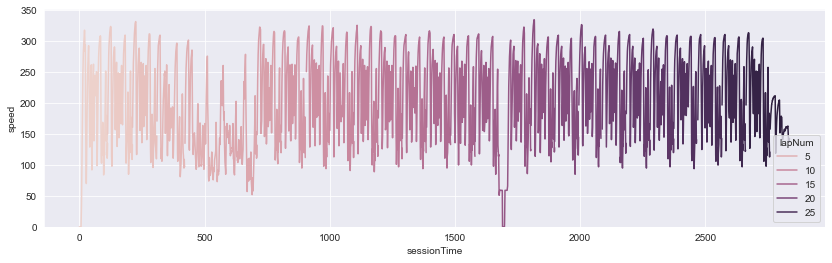

In [25]:
plt.figure(figsize=(14,4))
sns.lineplot(x=telemetry['sessionTime'], y=telemetry['speed'], hue=telemetry['lapNum'])
plt.ylim(0,);

In [26]:
for j, i in enumerate(intervals):
    print(f"Lap {j+1}: {i[0]}")

Lap 1: 0
Lap 2: 113.18692016601562
Lap 3: 212.4939422607422
Lap 4: 309.6661682128906
Lap 5: 421.8433532714844
Lap 6: 557.2151489257812
Lap 7: 709.91650390625
Lap 8: 807.07373046875
Lap 9: 903.9109497070312
Lap 10: 1000.2314453125
Lap 11: 1096.958984375
Lap 12: 1193.3033447265625
Lap 13: 1289.8009033203125
Lap 14: 1386.74365234375
Lap 15: 1482.9525146484375
Lap 16: 1580.7933349609375
Lap 17: 1682.1109619140625
Lap 18: 1804.2569580078125
Lap 19: 1898.1837158203125
Lap 20: 1994.14404296875
Lap 21: 2087.499267578125
Lap 22: 2183.807373046875
Lap 23: 2279.1298828125
Lap 24: 2374.0888671875
Lap 25: 2469.609619140625
Lap 26: 2565.599609375
Lap 27: 2661.41064453125
Lap 28: 2757.882080078125


# Compare two laps

In [35]:
lap1 = 9
lap2 = 20
excerpt1 = telemetry[telemetry['lapNum'] == lap1].copy()
excerpt2 = telemetry[telemetry['lapNum'] == lap2].copy()
excerpt1['normalizedTime'] = excerpt1['sessionTime'] - intervals[lap1-1][0]
excerpt2['normalizedTime'] = excerpt2['sessionTime'] - intervals[lap2-1][0]

In [36]:
compare_df = excerpt1.append(excerpt2)

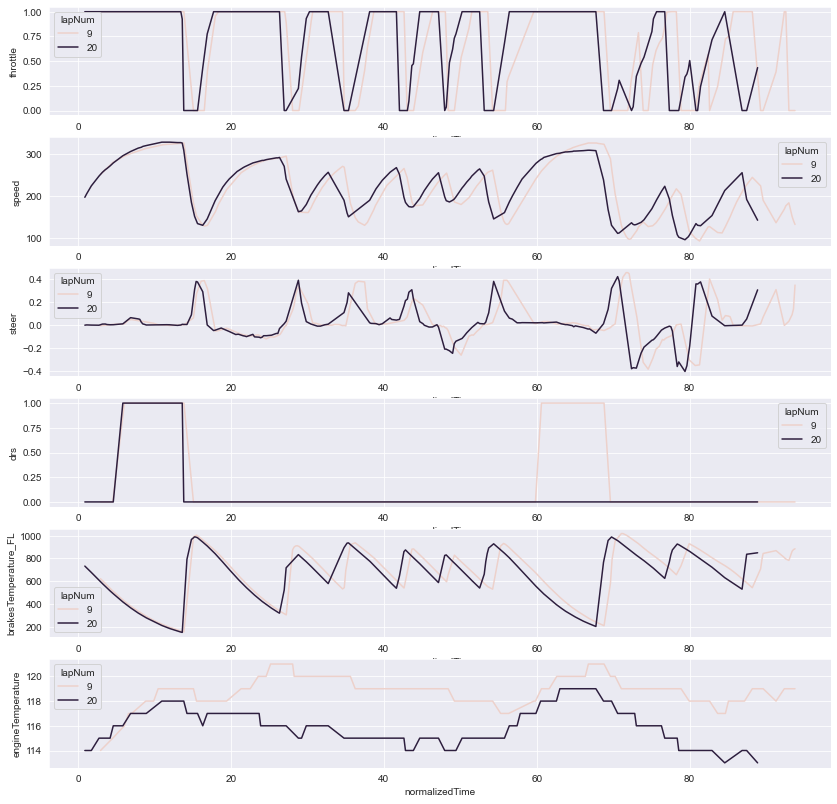

In [43]:
plt.figure(figsize=(14,14))
plt.subplot(6,1,1)
sns.lineplot(x='normalizedTime', y='throttle', hue='lapNum', data=compare_df)
plt.subplot(6,1,2)
sns.lineplot(x='normalizedTime', y='speed', hue='lapNum', data=compare_df)
plt.subplot(6,1,3)
sns.lineplot(x='normalizedTime', y='steer', hue='lapNum', data=compare_df)
plt.subplot(6,1,4)
sns.lineplot(x='normalizedTime', y='drs', hue='lapNum', data=compare_df)
plt.subplot(6,1,5)
sns.lineplot(x='normalizedTime', y='brakesTemperature_FL', hue='lapNum', data=compare_df)
plt.subplot(6,1,6)
sns.lineplot(x='normalizedTime', y='engineTemperature', hue='lapNum', data=compare_df);
plt.savefig("telemetry_analysis.png")

In [27]:
conn.close()